In [1]:
import spacy

In [2]:
import pandas as pd
data= pd.read_csv('myData.csv')
data

,Text,labels
0,I am reading score of Mahler is Symphony No . .,Error
1,I am not interested in cars or electric applia...,Correct
2,This is my homework for my English class .,Error
3,"In comparison , Canada is catches increased an...",Error
4,"Fortunately , my older sister is friend is a d...",Correct
...,...,...
9994,That encouraged me to continue to study Englis...,Correct
9995,"To improve my English listening skills ,",Correct
9996,And I collected many examples that body langua...,Correct
9997,One of his dreams was to be Captain Kirk .,Error


In [3]:
data.labels.value_counts()

Error      5004
Correct    4853
May Be       42
Name: labels, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['output'] = encoder.fit_transform(data['labels'])
data

,Text,labels,output
0,I am reading score of Mahler is Symphony No . .,Error,1
1,I am not interested in cars or electric applia...,Correct,0
2,This is my homework for my English class .,Error,1
3,"In comparison , Canada is catches increased an...",Error,1
4,"Fortunately , my older sister is friend is a d...",Correct,0
...,...,...,...
9994,That encouraged me to continue to study Englis...,Correct,0
9995,"To improve my English listening skills ,",Correct,0
9996,And I collected many examples that body langua...,Correct,0
9997,One of his dreams was to be Captain Kirk .,Error,1


In [40]:
nlp = spacy.load("en_core_web_lg")


In [43]:
data['vector'] = data['Text'].astype(str).apply(lambda text: nlp(text).vector)  

In [44]:
data

,Text,labels,output,vector
0,I am reading score of Mahler is Symphony No . .,Error,1,"[-0.7327181, -1.7527081, 0.4642664, -1.9000282..."
1,I am not interested in cars or electric applia...,Correct,0,"[-1.6445955, 0.45353, -3.791101, -2.2821543, 1..."
2,This is my homework for my English class .,Error,1,"[0.11857723, 0.30828005, -2.1158812, -3.270565..."
3,"In comparison , Canada is catches increased an...",Error,1,"[-1.9795066, -0.8068078, -1.8556616, 0.3810011..."
4,"Fortunately , my older sister is friend is a d...",Correct,0,"[-0.5611226, 1.7366109, -2.4873939, -2.0282624..."
...,...,...,...,...
9994,That encouraged me to continue to study Englis...,Correct,0,"[-0.37523368, 3.003442, -3.54865, -1.1602949, ..."
9995,"To improve my English listening skills ,",Correct,0,"[1.8708316, 1.6995986, -1.9222928, -3.549183, ..."
9996,And I collected many examples that body langua...,Correct,0,"[-1.0953476, -0.01602141, -2.2004638, -0.48900..."
9997,One of his dreams was to be Captain Kirk .,Error,1,"[-4.033604, 1.8436931, -1.7736031, -1.3125851,..."


In [87]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(data.vector,data.output,test_size=0.33,random_state=2022)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = RandomForestClassifier()

In [96]:
import numpy as np
x_train = np.stack(xtr)
x_test = np.stack(xte)

In [105]:
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.fit_transform(x_test)
print(scaled_train.shape)
print(scaled_test.shape)
print(ytr.shape)
print(yte.shape)
scaled_train.reshape(2009700,1)
scaled_test.reshape(990000,1)

(6699, 300)
(3300, 300)
(6699,)
(3300,)


array([[0.2791256 ],
       [0.4775852 ],
       [0.4189871 ],
       ...,
       [0.3395338 ],
       [0.47331527],
       [0.40232253]], dtype=float32)

In [106]:
model.fit(scaled_train,ytr)

RandomForestClassifier()

In [107]:
prediction = model.predict(scaled_test)

In [108]:
from sklearn.metrics import classification_report
print(classification_report(yte,prediction))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1590
           1       0.49      0.49      0.49      1662
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        35

    accuracy                           0.48      3300
   macro avg       0.24      0.24      0.24      3300
weighted avg       0.47      0.48      0.48      3300



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Text(95.72222222222221, 0.5, 'Actual')

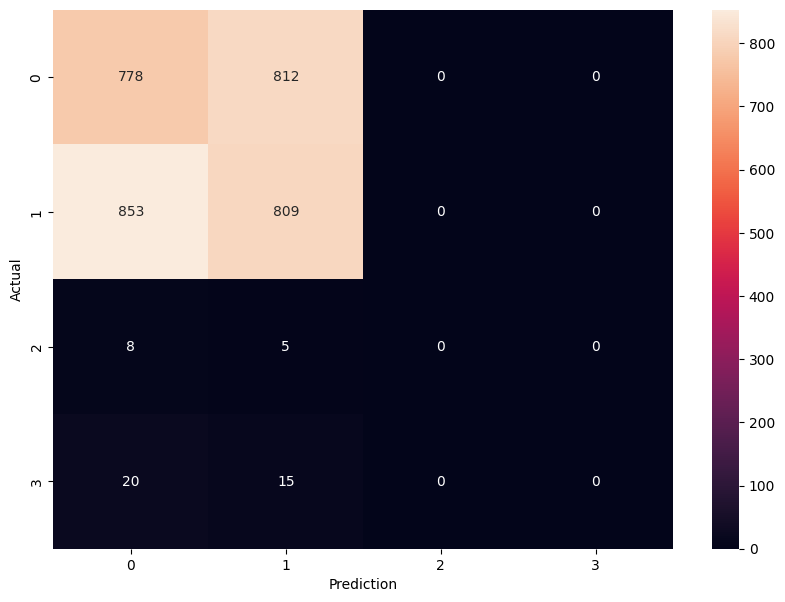

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yte, prediction)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')